In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

In [78]:
#load data
mydf = pd.read_csv("../DataSets/Cust_Segmentation.csv")
#data process
df= mydf.drop("Address", axis=1)
# df.head()

In [79]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]  # trans it to numpy array and remove index 0 col
X = np.nan_to_num(X)


scalar = StandardScaler()
Clust_dataset = scalar.fit_transform(X)

# For KMeans clustering, it's strongly recommended to scale your data unless you’re certain that all your features are already on comparable scales.
# Skipping the scaling step can lead to clusters that are biased toward features with larger values,
# which may not reflect meaningful patterns in the data.
# In your case, since you’re dealing with features like Income, Age, Card Debt, etc., that are likely on different scales,
# you should keep the scaling step to ensure accurate clustering.

In [80]:
clustNum = 3
k_means = KMeans(
    n_clusters=clustNum,
    init='k-means++',
    n_init=12,
)
k_means.fit(X)
labels = k_means.labels_
# labels

In [81]:
df["Clust Number"] = labels

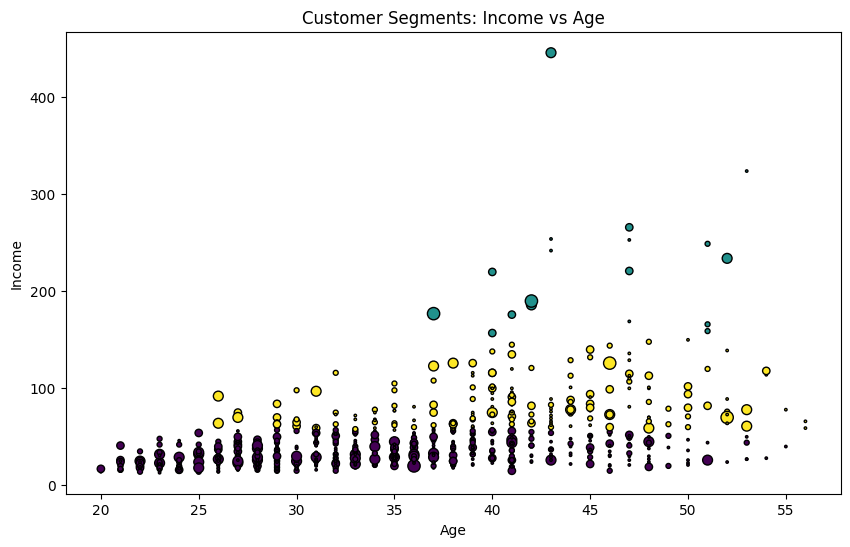

In [82]:
# Scatter plot between Income and Age
plt.figure(figsize=(10, 6))
area = np.pi *(X[:,1]**2)
plt.scatter(X[:,0], X[:,3], cmap='viridis', marker='o', s=area, edgecolor='k',c=labels.astype(float))
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Customer Segments: Income vs Age')
plt.show()


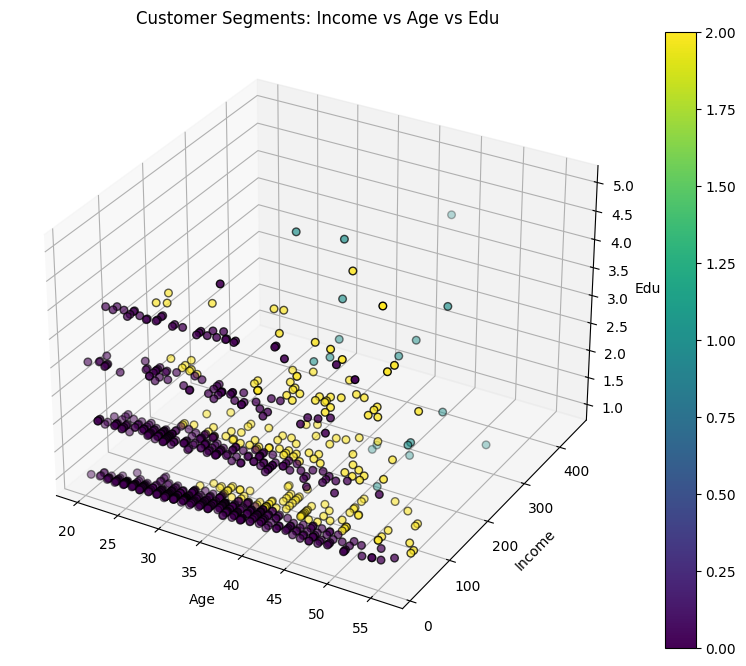

In [83]:
# 3-d figure
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111,projection='3d')
x=X[:,0] #age
y=X[:,1] #edu
y=X[:,3] #income
sc3d = ax.scatter(x,y,z, s=30, c = labels.astype(float), edgecolor='k')
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Edu')
ax.set_title('Customer Segments: Income vs Age vs Edu')

# Add colorbar for better visual understanding
plt.colorbar(sc3d)

plt.show()
